### Importação dos dados



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [6]:
from urllib.request import urlopen
import csv
urls = [url, url2, url3, url4]

def ler_csv(url):
  dados=[]
  with urlopen(url) as resposta:
    linhas = resposta.read().decode('utf-8').splitlines()
    leitor = csv.DictReader(linhas)
    for linhas in leitor:
      dados.append(linhas)
  return dados
faturamento_total=0
for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  faturamento_loja = 0

  for venda in dados_loja:
    preco= float(venda['Preço'])
    faturamento_loja +=preco

  print(f'Faturamento Loja {i+1}: R${faturamento_loja:.2f}')

  faturamento_total += faturamento_loja

print(f'Faturamento total de todas as lojas: R${faturamento_total:.2f}')

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58
Faturamento total de todas as lojas: R$5871490.79


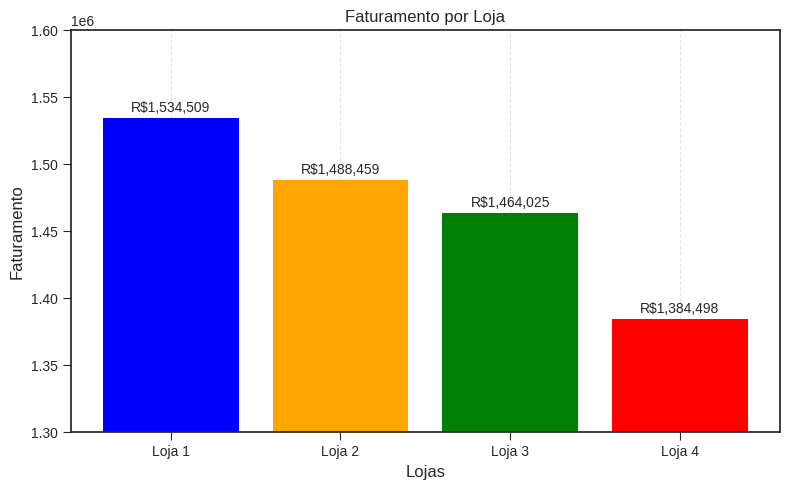

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Re-import matplotlib.pyplot to ensure plt is the module
import matplotlib.pyplot as plt

faturamento=[1534509.12,1488459.06, 1464025.03, 1384497.58]
lojas=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores=['blue', 'orange', 'green', 'red']


plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(8,5))
plt.bar(lojas, faturamento,  color=cores)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento', fontsize=12)
plt.ylim(1300000, 1600000)

plt.title('Faturamento por Loja')


for i, valor in enumerate(faturamento):
  plt.text(i, valor + 2000, f'R${valor:,.0f}', ha='center',va='bottom', fontsize=10)

plt.tight_layout()

plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()



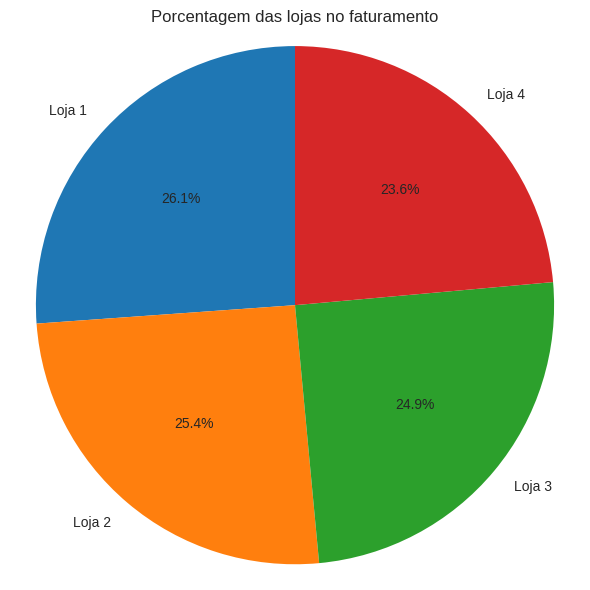

In [8]:
plt.figure(figsize=(6,6))
labels=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento=[1534509.12,1488459.06, 1464025.03, 1384497.58]
quantidades=faturamento
plt.pie(quantidades, labels=labels , autopct='%1.1f%%', startangle=90)
plt.title(f'Porcentagem das lojas no faturamento')
plt.axis('equal')
plt.tight_layout()


plt.show()

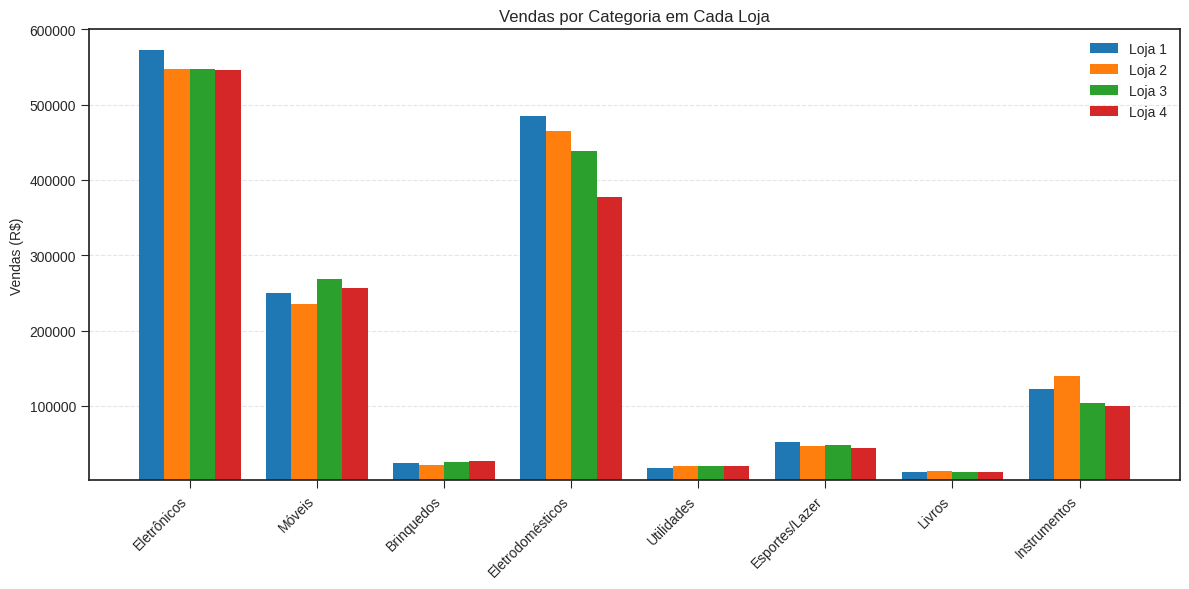

In [9]:
import matplotlib.pyplot as plt
import numpy as np

categorias = ['Eletrônicos', 'Móveis', 'Brinquedos', 'Eletrodomésticos', 'Utilidades','Esportes/Lazer', 'Livros', 'Instrumentos']

loja1 = [572659.23, 250178.11, 23993.78, 484913.36, 16931.48, 52387.55, 11713.92, 121731.69]
loja2 = [547773.71, 235234.68, 21262.21, 464758.13, 19662.86, 46326.09, 13454.35, 139987.03]
loja3 = [547699.92, 268095.56, 25869.20, 438984.89, 20080.21, 47456.10, 12664.70, 103174.45]
loja4 = [545966.86, 256705.65, 27015.67, 377680.65, 20098.83, 44465.65, 12427.77, 100136.50]

x = np.arange(len(categorias))
largura= 0.2

plt.figure(figsize=(12,6))
plt.bar(x - 1.5*largura, loja1, width=largura, label='Loja 1')

plt.bar(x - 0.5*largura, loja2, width=largura, label='Loja 2')
plt.bar(x + 0.5*largura, loja3, width=largura, label='Loja 3')
plt.bar(x + 1.5*largura, loja4, width=largura, label='Loja 4')


plt.xticks(x, categorias, rotation=45, ha='right')
plt.ylabel('Vendas (R$)')
plt.title('Vendas por Categoria em Cada Loja')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(1000, 600000)
plt.tight_layout()

plt.show()


Quantidade de vendas por categoria na loja 1:
eletronicos : 448 vendas
moveis : 465 vendas
brinquedos : 324 vendas
eletrodomesticos : 312 vendas
utilidades domesticas : 171 vendas
esporte e lazer : 284 vendas
livros : 173 vendas
instrumentos musicais : 182 vendas


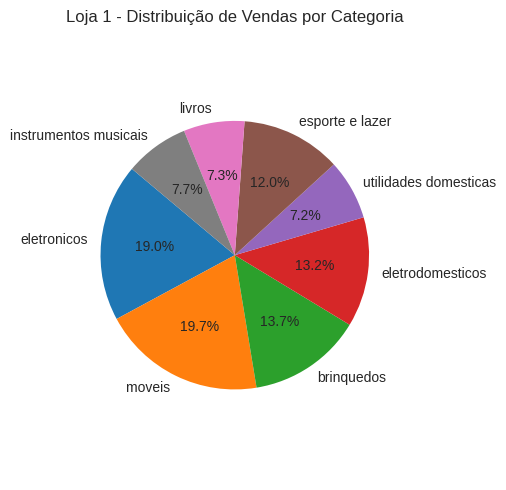


Quantidade de vendas por categoria na loja 2:
moveis : 442 vendas
instrumentos musicais : 224 vendas
esporte e lazer : 275 vendas
eletronicos : 422 vendas
utilidades domesticas : 181 vendas
brinquedos : 313 vendas
eletrodomesticos : 305 vendas
livros : 197 vendas


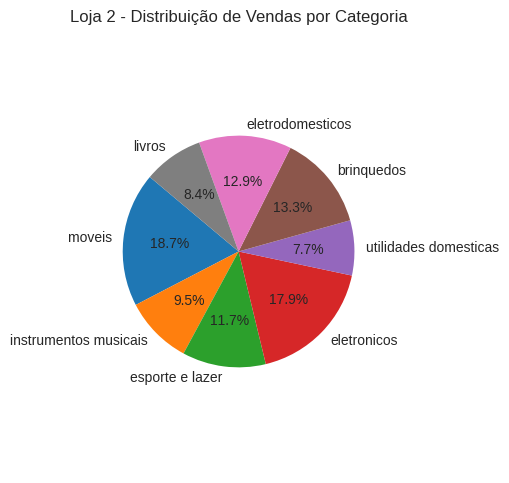


Quantidade de vendas por categoria na loja 3:
eletrodomesticos : 278 vendas
moveis : 499 vendas
instrumentos musicais : 177 vendas
esporte e lazer : 277 vendas
eletronicos : 451 vendas
brinquedos : 315 vendas
utilidades domesticas : 177 vendas
livros : 185 vendas


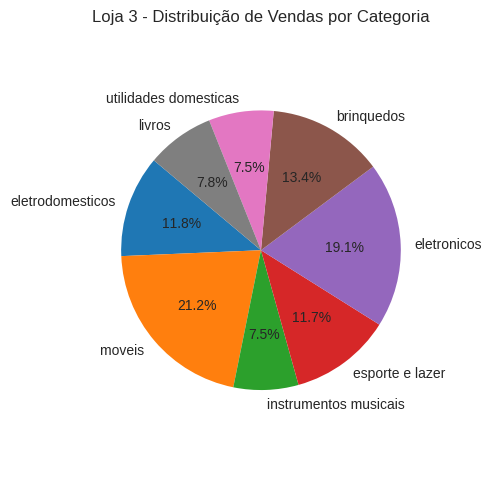


Quantidade de vendas por categoria na loja 4:
eletrodomesticos : 254 vendas
moveis : 480 vendas
esporte e lazer : 277 vendas
livros : 187 vendas
eletronicos : 451 vendas
instrumentos musicais : 170 vendas
brinquedos : 338 vendas
utilidades domesticas : 201 vendas


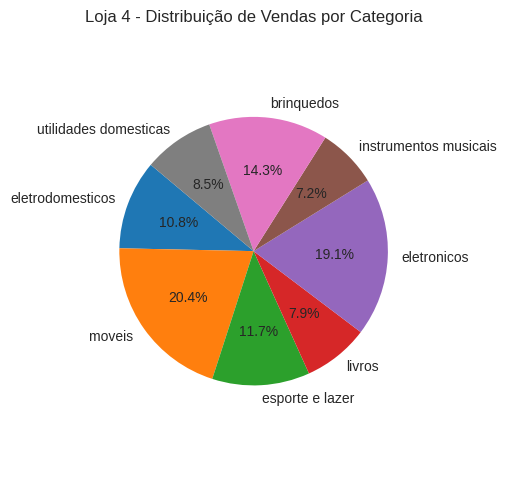


Quantidade de vendas totais por categoria (todas as lojas):
eletronicos : 1772 vendas
moveis : 1886 vendas
brinquedos : 1290 vendas
eletrodomesticos : 1149 vendas
utilidades domesticas : 730 vendas
esporte e lazer : 1113 vendas
livros : 742 vendas
instrumentos musicais : 753 vendas


In [10]:

import matplotlib.pyplot as plt

vendas_por_categoria = {}

for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  print(f'\nQuantidade de vendas por categoria na loja {1+i}:')

  categorias_loja={}

  for venda in dados_loja:
    categoria=venda['Categoria do Produto']


    if categoria in categorias_loja:
      categorias_loja[categoria]+= 1
    else:
      categorias_loja[categoria]=1

    if categoria in vendas_por_categoria:
      vendas_por_categoria[categoria]+= 1
    else:
      vendas_por_categoria[categoria]= 1
  for categoria, quantidade in categorias_loja.items():
    print(f'{categoria} : {quantidade} vendas')

  categorias = list(categorias_loja.keys())
  quantidades = list(categorias_loja.values())

  plt.figure(figsize=(5,5))
  plt.pie(quantidades, labels = categorias, autopct='%1.1f%%', startangle=140)
  plt.title(f'Loja {i+1} - Distribuição de Vendas por Categoria')
  plt.axis('equal')
  plt.tight_layout()

  plt.show()


print('\nQuantidade de vendas totais por categoria (todas as lojas):')
for categoria, quantidade in vendas_por_categoria.items():
  print(f'{categoria} : {quantidade} vendas')

# 3. Média de Avaliação das Lojas

In [11]:
valores=[]
for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  avaliacoes=[]

  for venda in dados_loja:
    avaliacoes.append(int(venda['Avaliação da compra']))
  media=sum(avaliacoes)/len(avaliacoes)
  valores.append(media)

  print(f'Avaliação da média da loja {i+1}: {media:.2f}')



Avaliação da média da loja 1: 3.98
Avaliação da média da loja 2: 4.04
Avaliação da média da loja 3: 4.05
Avaliação da média da loja 4: 4.00


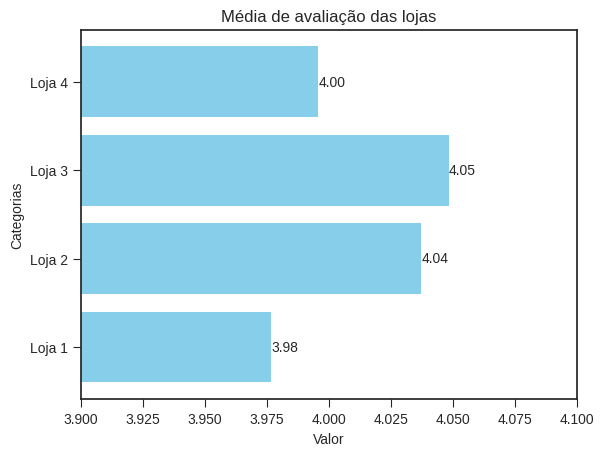

In [12]:
import matplotlib.pyplot as plt
def grafico_avaliacao(lista):
  # Dados para o gráfico de pizza
  etiquetas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
  valores = lista
  cores = ['red', 'green', 'blue', 'orange']



  plt.barh(etiquetas, valores, color='skyblue')
  plt.xlabel('Valor')
  plt.ylabel('Categorias')
  plt.title('Média de avaliação das lojas')
  plt.xlim(3.9,4.1)
  for i, valor in enumerate(valores):
    plt.text(valor, i, f'{valor:.2f}', va='center', ha='left', fontsize=10)
  plt.show()


grafico_avaliacao(valores)

# 4. Produtos Mais e Menos Vendidos

In [13]:
from collections import Counter

for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  produtos=[venda['Produto'] for venda in dados_loja]
  contagem=Counter(produtos)
  mais_frequentes=contagem.most_common()

  top_valores=sorted(set(contagem.values()),reverse= True)[:3]

  top_produtos = [(prod, qtd) for prod, qtd in contagem.items() if qtd in top_valores]
  top_produtos.sort(key=lambda x:(-x[1], x[0]))

  menos_valores=sorted(set(contagem.values()))[:3]

  menos_produtos = [(prod, qtd) for prod, qtd in contagem.items() if qtd in menos_valores]
  menos_produtos.sort(key=lambda x:(x[1], x[0]))

  print(f'\nLoja {i+1}')

  print(f"\nProdutos mais vendidos(com empates):")
  for produto, qtd in top_produtos:
    print(f'{produto} - {qtd} vendas')

  print(f"\nProdutos menos vendidos (com empates):")
  for produto, qtd in menos_produtos:
    print(f'{produto} - {qtd} vendas')


Loja 1

Produtos mais vendidos(com empates):
Guarda roupas - 60 vendas
Micro-ondas - 60 vendas
TV Led UHD 4K - 60 vendas
Secadora de roupas - 58 vendas
Blocos de montar - 56 vendas
Cômoda - 56 vendas

Produtos menos vendidos (com empates):
Celular ABXY - 33 vendas
Headset - 33 vendas
Panela de pressão - 35 vendas
Pandeiro - 36 vendas

Loja 2

Produtos mais vendidos(com empates):
Iniciando em programação - 65 vendas
Micro-ondas - 62 vendas
Bateria - 61 vendas

Produtos menos vendidos (com empates):
Jogo de tabuleiro - 32 vendas
Impressora - 34 vendas
Mesa de jantar - 34 vendas
Poltrona - 35 vendas

Loja 3

Produtos mais vendidos(com empates):
Kit banquetas - 57 vendas
Cama king - 56 vendas
Mesa de jantar - 56 vendas
Cômoda - 55 vendas
Jogo de panelas - 55 vendas

Produtos menos vendidos (com empates):
Blocos de montar - 35 vendas
Jogo de copos - 36 vendas
Micro-ondas - 36 vendas
Mochila - 36 vendas
Copo térmico - 38 vendas
Guitarra - 38 vendas

Loja 4

Produtos mais vendidos(com empate

In [14]:
from collections import Counter

for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  produtos=[venda['Produto'] for venda in dados_loja]
  contagem=Counter(produtos)

  mais_vendidos = contagem.most_common(3)

  menos_vendidos = contagem.most_common()[:-4:-1]




  print(f'\nLoja {i+1}')

  print(f"\nProdutos mais vendidos(com empates):")
  for produto, qtd in mais_vendidos:
    print(f'{produto} - {qtd} vendas')

  print(f"\nProdutos menos vendidos (com empates):")
  for produto, qtd in menos_vendidos:
    print(f'{produto} - {qtd} vendas')


Loja 1

Produtos mais vendidos(com empates):
Micro-ondas - 60 vendas
TV Led UHD 4K - 60 vendas
Guarda roupas - 60 vendas

Produtos menos vendidos (com empates):
Celular ABXY - 33 vendas
Headset - 33 vendas
Panela de pressão - 35 vendas

Loja 2

Produtos mais vendidos(com empates):
Iniciando em programação - 65 vendas
Micro-ondas - 62 vendas
Bateria - 61 vendas

Produtos menos vendidos (com empates):
Jogo de tabuleiro - 32 vendas
Impressora - 34 vendas
Mesa de jantar - 34 vendas

Loja 3

Produtos mais vendidos(com empates):
Kit banquetas - 57 vendas
Mesa de jantar - 56 vendas
Cama king - 56 vendas

Produtos menos vendidos (com empates):
Blocos de montar - 35 vendas
Micro-ondas - 36 vendas
Mochila - 36 vendas

Loja 4

Produtos mais vendidos(com empates):
Cama box - 62 vendas
Faqueiro - 59 vendas
Dashboards com Power BI - 56 vendas

Produtos menos vendidos (com empates):
Guitarra - 33 vendas
Guarda roupas - 34 vendas
Violão - 37 vendas


# 5. Frete Médio por Loja


In [15]:
from urllib.request import urlopen
import csv
urls = [url, url2, url3, url4]


def ler_csv(url):
  dados=[]
  with urlopen(url) as resposta:
    linhas = resposta.read().decode('utf-8').splitlines()
    leitor = csv.DictReader(linhas)
    for linhas in leitor:
      dados.append(linhas)
  return dados
valores_media=[]
for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  frete=[]
  for venda in dados_loja:
    frete.append(float(venda['Frete']))
  media=sum(frete)/len(frete)
  valores_media.append(media)

  print(f'Avaliação da média da loja {i+1}: {media:.2f}')

Avaliação da média da loja 1: 31.28
Avaliação da média da loja 2: 33.62
Avaliação da média da loja 3: 33.07
Avaliação da média da loja 4: 31.28


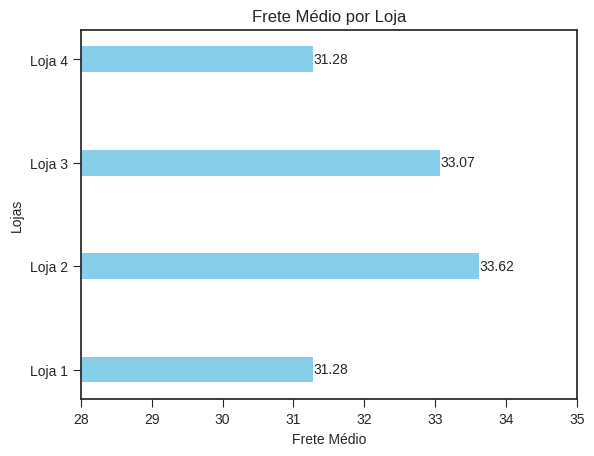

In [16]:
import matplotlib.pyplot as plt
def grafico_avaliacao_media(lista):
  # Dados para o gráfico de pizza
  etiquetas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
  valores = lista
  cores = ['red', 'green', 'blue', 'orange']

  plt.barh(etiquetas, valores, color='skyblue', height=0.25)
  plt.xlabel('Frete Médio')
  plt.ylabel('Lojas')
  plt.title('Frete Médio por Loja')
  plt.xlim(28, 35)
  for i, valor in enumerate(valores):
    plt.text(valor, i, f'{valor:.2f}', va='center', ha='left', fontsize=10)
  plt.show()

grafico_avaliacao_media(valores_media)

#Relatório
Lavando em consideração a análise realizada com base nos dados das quatro lojas, conclui-se que a loja mais indicada para o senhor João vender é a loja 4. Essa loja apresenta o menor faturamento entre as quatro, além de ocupar a terceira posição na média de avaliação, com nota 4, ficando atrás apenas da loja 1, que possui média de 3,98. Além disso, a loja 4 é que menos vende eletrodómesticos, que uma categoria que mais gera dinheiro para as lojas.